FINAL GROUP REPORT GROUP 44

TITLE: Predicting the Seeding of a Tennis Winner Through Data Analysis

PREDICTIVE QUESTION:

Given a winner’s number of aces (w_ace) and number of serve points (w_pvpt), predict what seed number (1-3) this player is, in a clay surface tournament.

INTRODUCTION:

We utilized the JeffSackmann (2023) ATP Tennis dataset, focusing on data from 2017 to 2019. Our project aims to predict the winner seed number (winner_seed, chr) in clay surface tournaments, using two factors: winner aces (w_ace, dbl) and serve points (w_svpt, dbl). In tennis, "seed" indicates a player's initial ranking, while an "ace" is an untouched serve, and "serve points" are serves until the receiver fails to return. We chose clay as it poses challenges for ace scoring. Despite the original dataset's 50 predictors, our analysis centers on w_ace and w_svpt. The source link for the data is: https://github.com/JeffSackmann/tennis_atp.


In tennis, a player's serve, particularly aces (unreturned serves), significantly influences performance. Crucial stats for evaluation include aces per match, first-serve points won, and service games won percentage. Notably, top performers in these stats often hold season-ending rankings below 30. Wimbledon studies reveal seeded players excel in aces and first-serve points. Recognizing these links, we use aces (w_ace) and serve points (w_svpt) to predict the seed number (winner_seed) based on findings by David Whiteside and Machar Reid (2017).
					
In the initial analysis, we'll filter for clay surfaces exclusively for more precise predictions, and the winner_seed to less than 3 for a simpler classification. We'll select the columns w_ace, w_svpt, winner_seed, and surface for further analysis, dropping any NA values in the remaining data.



METHODS AND RESULTS:

In [3]:
# Install "kknn" & "tidymodels" package
install.packages("kknn")
install.packages("tidymodels")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘rsample’, ‘tune’, ‘workflowsets’


Warning message in install.packages("tidymodels"):
“installation of package ‘rsample’ had non-zero exit status”
Warning message in install.packages("tidymodels"):
“installation of package ‘tune’ had non-zero exit status”
Warning message in install.packages("tidymodels"):
“installation of package ‘workflowsets’ had non-zero exit status”
Warning message in install.packages("tidymodels"):
“installation of package ‘tidymodels’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



1.‘install.packages’: a function in R used to install one or more packages from repositories. In this case, it is used to install the “kknn” package.
 						
2.‘ "kknn" "tidymodels" "rlang" ’: the names of the package that the install.packages function is instructed to install. Packages in R are collections of functions, data, and compiled code that extend the capabilities of R.		


In [4]:
# Load the packages
library(tidyverse)
library(repr)
library(tidymodels)

ERROR: Error in library(tidymodels): there is no package called ‘tidymodels’


The package is installed and loaded with the 'library' function in the R session, enabling us to utilize the functions and features provided by the "kknn" package for k-nearest neighbors classification and regression in R. 			

‘library(tidyverse)’: loads the ‘tidyverse’ package. The ‘tidyverse’ is a collection of R packages that work together to provide a consistent and coherent set of functions for data manipulation and visualization.						


‘library(repr)’: loads the ‘repr’ package. The ‘repr’ package is often used for setting the size of plots in R. 						


‘library(tidymodels)’: loads the ‘tidymodels’ package. The ‘tidymodels’ framework provides a consistent and tidy interface for modeling and machine learning in R. 


In [5]:
# Read the data into R
install.packages("tidymodels")
url <- "https://raw.githubusercontent.com/Caseyxyq/Dsci100_group44/main/atp2017-2019.csv"
atp_data <- read_csv(url)
# Show only the first three rows
head(atp_data, n = 3)

also installing the dependencies ‘rsample’, ‘tune’, ‘workflowsets’


Warning message in install.packages("tidymodels"):
“installation of package ‘rsample’ had non-zero exit status”
Warning message in install.packages("tidymodels"):
“installation of package ‘tune’ had non-zero exit status”
Warning message in install.packages("tidymodels"):
“installation of package ‘workflowsets’ had non-zero exit status”
Warning message in install.packages("tidymodels"):
“installation of package ‘tidymodels’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

New names:
• `` -> `...1`
Rows: 6866 Columns: 50
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (16): tourney_id, tourney_name, surface, tourney_level, winner_seed, win...
dbl (34): ...1, draw_size, tourney_date, match_num, winner_id, winner_ht, wi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the colum

...1,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,⋯,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2,⋯,54,34,20,14,10,15,9,3590,16,1977
1,2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4,⋯,52,36,7,10,10,13,16,1977,239,200
2,2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2,⋯,27,15,6,8,1,5,9,3590,40,1050


url <-"https://raw.githubusercontent.com/Caseyxyq/Dsci100_group44/main/atp2017-2019.csv": This line assigns a URL (Uniform Resource Locator) to the variable url. The URL points to a CSV file hosted on GitHub, specifically the “atp2017-2019.csv” file in the “Dsci100_group44” repository.					


The ‘read_csv’ function reads the CSV data from the specified URL into R. The resulting data is assigned to the variable ‘atp_data’. 							


The ‘head’ function displays the first three rows of the ‘atp_data’ dataset. The ‘n’ parameter specifies the number of rows to show. Overall, this code reads a CSV file from a URL and loads it into an R data frame (atp_data). The head function is then used to display the first three rows of this dataset, in order to explore and get a quick overview of the dataset. 


In [6]:
# Filter and select for focal data
install.packages("tidymodels")
filtered_selected_columns <- atp_data |>
    # Convert the character winner_seed variable to the numeric datatype so it can be filtered
    mutate(winner_seed = as.numeric(winner_seed)) |>
    # Filter for Clay type of surface and winner seed values less than equal to 3
    filter(surface == "Clay", winner_seed <= 3.00) |> 
    # Select the two predictors (w_ace, w_svpt) and the response variable (winner_seed)
    select(w_ace, w_svpt, winner_seed)
# Show only the first three rows
head(filtered_selected_columns, n = 3)

also installing the dependencies ‘rsample’, ‘tune’, ‘workflowsets’


Warning message in install.packages("tidymodels"):
“installation of package ‘rsample’ had non-zero exit status”
Warning message in install.packages("tidymodels"):
“installation of package ‘tune’ had non-zero exit status”
Warning message in install.packages("tidymodels"):
“installation of package ‘workflowsets’ had non-zero exit status”
Warning message in install.packages("tidymodels"):
“installation of package ‘tidymodels’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `winner_seed = as.numeric(winner_seed)`.
Caused by warning:
! NAs introduced by coercion”


w_ace,w_svpt,winner_seed
<dbl>,<dbl>,<dbl>
3,94,3
4,40,3
4,52,3


The ‘atp_data’ dataset is piped to a series of data manipulation operations.
						
Thereafter, ‘mutate’ function is used to create a new variable ‘winner_seed’ by converting the existing character variable ‘winner_seed’ to a numeric datatype.
						
Then, the dataset is filtered to include only rows where the ‘surface’ is “Clay” and the ‘winner_seed’ is less than or equal to 3.
					
Three columns are selected from the filtered dataset: ‘w_ace’, ‘w_svpt’, and ‘winner_seed’. These columns represent the predictors and response variables for the analysis.
					
The first three rows of the resulting dataset (‘filtered_selected_columns’) are displayed. The ‘head’ function is used for this purpose.
					
In summary, this code filters the original dataset to include rows with a specific surface type ("Clay") and conditions on the 'winner_seed' variable. It then selects three columns and displays the first three rows of the resulting dataset, preparing the data for modeling. 


In [7]:
# Finalize the data
install.packages("tidymodels")
final_atp_data <- filtered_selected_columns |>
    # Remove the NA values
    drop_na() |>
    # convert the character winner_seed variable to the factor datatype so it can be classified
    mutate(winner_seed = as_factor(winner_seed))
# Show only the first three rows
head(final_atp_data, n = 3)

also installing the dependencies ‘rsample’, ‘tune’, ‘workflowsets’


Warning message in install.packages("tidymodels"):
“installation of package ‘rsample’ had non-zero exit status”
Warning message in install.packages("tidymodels"):
“installation of package ‘tune’ had non-zero exit status”
Warning message in install.packages("tidymodels"):
“installation of package ‘workflowsets’ had non-zero exit status”
Warning message in install.packages("tidymodels"):
“installation of package ‘tidymodels’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



w_ace,w_svpt,winner_seed
<dbl>,<dbl>,<fct>
3,94,3
4,40,3
4,52,3


This code is the final step in preparing the dataset for analysis. It removes rows with missing values and converts the ‘winner_seed’ variable to a factor, as ‘winner_seed’ is a categorical response variable. The resulting dataset (‘final_atp_data’) is then shown with the first three rows displayed.



In [8]:
# Summarize final data by reporting the number of observations in each winner seed
install.packages("tidymodels")
number_of_obs <- group_by(final_atp_data, winner_seed) |>
    summarize(count = n())
number_of_obs

also installing the dependencies ‘rsample’, ‘tune’, ‘workflowsets’


Warning message in install.packages("tidymodels"):
“installation of package ‘rsample’ had non-zero exit status”
Warning message in install.packages("tidymodels"):
“installation of package ‘tune’ had non-zero exit status”
Warning message in install.packages("tidymodels"):
“installation of package ‘workflowsets’ had non-zero exit status”
Warning message in install.packages("tidymodels"):
“installation of package ‘tidymodels’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



winner_seed,count
<fct>,<int>
1,99
2,97
3,76


Value explanations: After filtering for clay surface and predicting the top three winner seeds, a summary table displays the number of observations in each winner seed category. The final dataset comprises 272 players: 99 seeded 1, 97 seeded 2, and 76 seeded 3. Counts for winner seeds 1 and 2 are nearly equal, and though winner seed 3 has fewer people, the difference is relatively small and not statistically significant enough to draw a conclusion. 


In [9]:
# Summarize final data by reporting parameters of the two predictor

# Parameters of the ace predictor
install.packages("tidymodels")
ace_parameters <- final_atp_data |>
    mutate(predictor = "winner's number of aces") |>
    summarize(predictor = first(predictor),
              minimum = min(w_ace),
              maximum = max(w_ace),
              mean = mean(w_ace),
              median = median(w_ace))

# Parameters of the svpt predictor
svpt_parameters <- final_atp_data |>
    mutate(predictor = "winner's number of serve points") |>
    summarize(predictor = first(predictor),
              minimum = min(w_svpt),
              maximum = max(w_svpt),
              mean = mean(w_svpt),
              median = median(w_svpt))

# Combine two sets of paramters into a single summary table
combined_parameters <- bind_rows(ace_parameters, svpt_parameters)
combined_parameters

also installing the dependencies ‘rsample’, ‘tune’, ‘workflowsets’


Warning message in install.packages("tidymodels"):
“installation of package ‘rsample’ had non-zero exit status”
Warning message in install.packages("tidymodels"):
“installation of package ‘tune’ had non-zero exit status”
Warning message in install.packages("tidymodels"):
“installation of package ‘workflowsets’ had non-zero exit status”
Warning message in install.packages("tidymodels"):
“installation of package ‘tidymodels’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



predictor,minimum,maximum,mean,median
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
winner's number of aces,0,25,4.529412,4
winner's number of serve points,10,173,71.882353,67



Value explanations: This summary table presents statistics for two predictors: "winner’s number of aces" and "winner’s number of serve points." The columns include predictor type and four parameters for each: minimum, maximum, mean, and median values. Analyzing these parameters, we can draw conclusions. Among the 272 people who have the top three seed numbers, their number of aces ranges from 0 to 25, suggesting that even if players don’t hit any aces, they still have the chance to become top three seed players. The mean number of winner’s aces is 4.529412. In statistics, the mean value represents the center of a data distribution. It indicates where most values are concentrated. In this case, the winner’s number of aces is mostly centered around 4 and 5. Moving to the median value, it is the middle value when the data is ordered from least to greatest and the median value of the winner’s aces is 4. Both the considerably lower mean value and median value compared with the maximum value can give us a sense that the number of aces won’t affect the seed number significantly, since a large proportion of the top seed players are scoring low numbers of aces. This might be a reason explaining why, in our final result, the accuracy of using the winner’s number of aces and the winner’s number of serve points to predict the winner’s seed number is very low. The winner’s number of serve points ranges from 10 to 173, with a mean of 71.88 and a median of 67. Given that the median value is smaller than the mean value, the distribution of the winner’s number of serve points data is right-skewed, implying most data are concentrated on the lower end, with a few high values pulling the mean to the right.	


also installing the dependencies ‘rsample’, ‘tune’, ‘workflowsets’


Warning message in install.packages("tidymodels"):
“installation of package ‘rsample’ had non-zero exit status”
Warning message in install.packages("tidymodels"):
“installation of package ‘tune’ had non-zero exit status”
Warning message in install.packages("tidymodels"):
“installation of package ‘workflowsets’ had non-zero exit status”
Warning message in install.packages("tidymodels"):
“installation of package ‘tidymodels’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



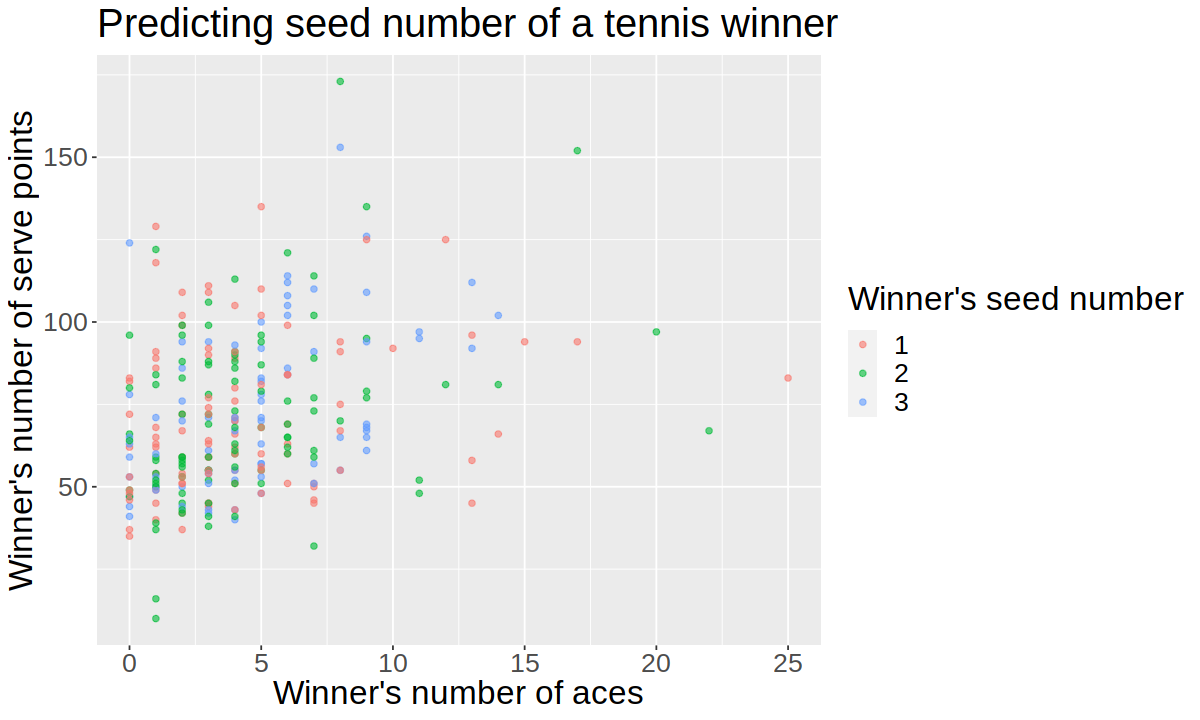

In [10]:
# Create a scatter plot of winner's number of serve points versus number of aces,
# Label the points with winner's seed number
install.packages("tidymodels")
atp_plot <- final_atp_data |>  
    ggplot(aes(x = w_ace, 
               y = w_svpt, 
               colour = winner_seed)) +
    geom_point(alpha = 0.6) +
    labs(x = "Winner's number of aces",
         y = "Winner's number of serve points",
         colour = "Winner's seed number") +
    ggtitle("Predicting seed number of a tennis winner") +
    theme(text = element_text(size = 20))
options(repr.plot.width = 10, repr.plot.height = 6)
atp_plot

This R code is creating a scatter plot using the ggplot2 package to visualize the relationship between the winner’s number of aces (w_ace) and the winner’s number of serve points (w_svpt). The points in the scatter plot are colored based on the winner’s seed number (winner_seed), and each point is labeled with the respective winner’s seed number.
					
Upon breaking down the code and interpreting the resulting scatter plot: 		 	 	 					
Explanation of the code:
					
‘final_atp_data’ is the data frame (or tibble) containing information about tennis matches, and it is used as the data source for the plot.
					
‘ggplot(aes(...))’: sets up the basic structure of the plot. It specifies the variables for the x-axis (w_ace), y-axis (w_svpt), and the color of points (winner_seed).
					
‘geom_point(alpha = 0.6)’: adds points to the plot, and the alpha parameter controls the transparency of the points, making it easier to see overlapping points.
					
‘labs(...)’: sets the labels for the x-axis, y-axis, and color legend.
 ‘ggtitle(...)’: sets the title of the plot.
 ‘theme(text = element_text(size = 20))’: adjusts the text size in the plot to make it more readable.
					
The resulting scatter plot visualizes the relationship between the number of aces and the number of serve points for tennis winners. Each point on the plot represents a tennis match, and the color of the point corresponds to the winner’s seed number. The alpha parameter (transparency) is used to make overlapping points more distinguishable.
					
The plot provides an overview of the distribution of points and allows for an initial assessment of any patterns or trends between the variables. 


In [11]:
# Set the seed
set.seed(3456) 

# Create the 75/25 split of the training data into training and validation
install.packages("tidymodels")
atp_split <- initial_split(final_atp_data, prop = 0.75, strata = winner_seed)
atp_train <- training(atp_split)
atp_test <- testing(atp_split)

also installing the dependencies ‘rsample’, ‘tune’, ‘workflowsets’


Warning message in install.packages("tidymodels"):
“installation of package ‘rsample’ had non-zero exit status”
Warning message in install.packages("tidymodels"):
“installation of package ‘tune’ had non-zero exit status”
Warning message in install.packages("tidymodels"):
“installation of package ‘workflowsets’ had non-zero exit status”
Warning message in install.packages("tidymodels"):
“installation of package ‘tidymodels’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



ERROR: Error in initial_split(final_atp_data, prop = 0.75, strata = winner_seed): could not find function "initial_split"



This code sets the seed for reproducibility and then splits the final ATP tennis dataset into training and testing sets using a 75/25 split, allowing for the evaluation of model performance on unseen data. The use of ‘strata’ ensures that the distribution of ‘winner_seed’ levels is maintained in both the training and testing sets. 		 	 	 		


In [3]:
# Standardize the recipe
install.packages("tidymodels")
atp_recipe <- recipe(winner_seed ~ w_ace + w_svpt, data = atp_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

also installing the dependencies ‘rsample’, ‘tune’, ‘workflowsets’


Warning message in install.packages("tidymodels"):
“installation of package ‘rsample’ had non-zero exit status”
Warning message in install.packages("tidymodels"):
“installation of package ‘tune’ had non-zero exit status”
Warning message in install.packages("tidymodels"):
“installation of package ‘workflowsets’ had non-zero exit status”
Warning message in install.packages("tidymodels"):
“installation of package ‘tidymodels’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



ERROR: Error in step_center(step_scale(recipe(winner_seed ~ w_ace + w_svpt, data = atp_train), : could not find function "step_center"


This code is creating a recipe for modeling the ‘winner_seed’ variable based on the predictor variables ‘w_ace’ and ‘w_svpt’ in the ATP tennis training dataset (‘atp_train’). The recipe includes steps for scaling and centering the predictor variables. Scaling will help improve the performance and convergence of the model. 


In [12]:
# Create a model specification
install.packages("tidymodels")
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

also installing the dependencies ‘rsample’, ‘tune’, ‘workflowsets’


Warning message in install.packages("tidymodels"):
“installation of package ‘rsample’ had non-zero exit status”
Warning message in install.packages("tidymodels"):
“installation of package ‘tune’ had non-zero exit status”
Warning message in install.packages("tidymodels"):
“installation of package ‘workflowsets’ had non-zero exit status”
Warning message in install.packages("tidymodels"):
“installation of package ‘tidymodels’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



ERROR: Error in set_mode(set_engine(nearest_neighbor(weight_func = "rectangular", : could not find function "set_mode"


The code is creating a model specification for a k-nearest neighbors (kNN) classification model using the ‘kknn’ package. 


In [ ]:
# Perform cross-validation
install.packages("tidymodels")
atp_vfold <- vfold_cv(atp_train, v = 5, strata = winner_seed)

Summary: The code utilizes the 'vfold_cv' function from the 'tidymodels' framework to create cross-validation folds for the ATP tennis training dataset ('atp_train'). Cross-validation involves partitioning the data into subsets, training the model on some folds, and evaluating it on others. This iterative process provides a more robust estimate of model performance by averaging performance metrics over the folds.

In [ ]:
# Select the number of neighbors
install.packages("tidymodels")
k_vals <- tibble(neighbors = seq(from = 1, to = 30, by = 1))

knn_results <- workflow() |>
  add_recipe(atp_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = atp_vfold, grid = k_vals) |>
  collect_metrics()

accuracies <- knn_results |>
  filter(.metric == "accuracy")

accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))
accuracy_vs_k

In [ ]:
# Select the number of neighbors to K = 7 due to its highest accuracy
install.packages("tidymodels")
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 7) |>
  set_engine("kknn") |>
  set_mode("classification")

In [ ]:
# Fit the knn model
install.packages("tidymodels")
knn_fit <- workflow() |>
  add_recipe(atp_recipe) |>
  add_model(knn_spec) |>
  fit(data = atp_train)

In [ ]:
# Get predictions on the validation data
install.packages("tidymodels")
atp_test_predictions <- predict(knn_fit, atp_test) |>
  bind_cols(atp_test)

In [ ]:
# compute the accuracy
install.packages("tidymodels")
atp_test_predictions |>
  metrics(truth = winner_seed, estimate = .pred_class) |>
  filter(.metric == "accuracy")

In [ ]:
# Create the confusion matrix for the predictor,
# Show the table of predicted labels and correct labels
install.packages("tidymodels")
confusion <- atp_test_predictions |>
             conf_mat(truth = winner_seed, estimate = .pred_class)
confusion

Calculate Accuracy using the confusion matrix:

Accuracy = (8+7+9)/(8+10+7+7+7+3+10+8+9) = 0.3478

The code is creating a confusion matrix for a predictor’s performance on a test dataset. 


Description of the code: Upon breaking down the code and the resulting confusion matrix: ‘atp_test_predictions’ is the data frame (or tibble) containing the predictions made by the model on a test dataset.
					
‘truth = winner_seed’ specifies the true labels in the test dataset, and ‘estimate = .pred_class’ specifies the predicted labels.
					
A confusion matrix is a table that is often used to describe the performance of a classification model on a set of data for which the true values are known.
					
The rows represent the predicted classes, and the columns represent the true classes. The value in the (i, j) cell represents the number of instances where the true class is i and the predicted class is j.
					
For example: In the first row, first column (cell (1,1)), there are 8 instances where the true class is 1 and the predicted class is also 1. In the second row, third column (cell (2,3)), there are 3 instances where the true class is 3, but the model predicted class 2.
					
This matrix offers a detailed view of the model's performance for each class. You can calculate various metrics, including accuracy, precision, and recall, from it. These metrics aid in evaluating both the overall model performance and its performance for individual classes.
					
After assessing accuracy with the confusion matrix, we find it to be 0.3478 (~34%). The scatter plot reveals closely clustered points, indicating a lack of significant correlation between the two variables. Consequently, the accuracy appears relatively low.	

In [ ]:
# Scatter plot of where background color indicates the decision of the classifier
install.packages("tidymodels")
are_grid <- seq(min(final_atp_data$w_ace), 
                max(final_atp_data$w_ace), 
                length.out = 100)
smo_grid <- seq(min(final_atp_data$w_svpt), 
                max(final_atp_data$w_svpt), 
                length.out = 100)
asgrid <- as_tibble(expand.grid(w_ace = are_grid, 
                                w_svpt = smo_grid))

# use the fit workflow to make predictions at the grid points
knnPredGrid <- predict(knn_fit, asgrid)

# bind the predictions as a new column with the grid points
prediction_table <- bind_cols(knnPredGrid, asgrid) |> 
  rename(winner_seed = .pred_class)

# plot:
# 1. the colored scatter of the original data
# 2. the faded colored scatter for the grid points
atpclass_plot <-
  ggplot() +
  geom_point(data = final_atp_data, 
             mapping = aes(x = w_ace, 
                           y = w_svpt, 
                           color = winner_seed), 
             alpha = 0.75) +
  geom_point(data = prediction_table, 
             mapping = aes(x = w_ace, 
                           y = w_svpt, 
                           color = winner_seed), 
             alpha = 0.02, 
             size = 5) +
  labs(color = "Diagnosis", 
       x = "Winner Ace", 
       y = "Winner Serve Pts.") +
    ggtitle("Classification Results")+
  scale_color_manual(values = c("orange2", "steelblue2", "green2")) +
  theme(text = element_text(size = 12))

atpclass_plot

DISCUSSION:					

With our analysis, we've visualized the relationship between a tennis player's seed number, aces achieved by the winner, and serve points received on clay ground. We selected the optimal classifier neighbor number as K=7 using KNN classification, producing a graph showing the K-nearest neighbor with the highest prediction accuracy. Another graph displays the predicted and classified seed numbers of the data points. However, our predictor's accuracy is hindered by inherent traits in the data. According to tennis rules, players with similar skills are placed at opposite ends of seed numbers, ensuring top players don’t face each other early in tournaments. In the classification visualization, the same color (same class/seed number) is placed at generally opposite areas of the graph. Players with the lowest and highest winner aces are classified as the same seed type to compete against each other. Another data trait affecting our model's accuracy is the possibility of inaccurately assigned seed numbers or players performing better than their initial seed ranking. Overall, based on our data and game rules, we concluded that there's no linear relationship between w_ace, w_svpt, and winner_seed, but there is a fairly high correlation. The analysis verifies seed assignments and prediction methods to a certain extent. While generally accurate, our predictor's lower accuracy raises questions about the methods used to predict winner seed and their reflection of player skill. Comparing our data to surfaces other than clay and exploring if they affect player performance could offer additional insights. We hope these results stimulate further research into the accuracy of current seed prediction methods and their reflection of player skill in tournaments.


REFERENCES:

Cooper J. (2019 Nov. 4) Seeding in Competitive Tennis Tournaments [Blog post] Retrieved from https://www.liveabout.com/definition-of-seeding-3207821

David Whiteside & Machar Reid (2017) Spatial characteristics of professional tennis serves with implications for serving aces: A machine learning approach, Journal of Sports Sciences, 35:7, 648-654, DOI: 10.1080/02640414.2016.1183805

JeffSackmann (2023) ATP Tennis Rankings, Results, and Stats, https://github.com/JeffSackmann/tennis_atp

